In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame([
     ['Morning','Monday',30],
     ['Morning','Tuesday',36],
     ['Morning','Wednesaday',33],
     ['Morning','Thursday',30],
     ['Morning','Friday',27],
     ['Morning','Saturday',25],
     ['Morning','Sunday',20],
    ['Lunch','Tuesday',35],
    ['Dinner','Wednesday',39],
    ['Lunch','Thursday',40],
    ['Morning','Friday',29],
    ['Lunch','Saturday',34],
    ['Evening','Sunday',35],
    ['Morning','Monday',37],
    ['Lunch','Tuesday',33],
    ['Dinner','Wednesday',38],
    ['Lunch','Thursday',47],
    ['Morning','Friday',45],
    ['Lunch','Saturday',56],
    ['Evening','Sunday',78],
    ['Morning','Monday',39],
    ['Lunch','Tuesday',33],
    ['Dinner','Wednesday',30],
    ['Lunch','Thursday',46],
    ['Morning','Friday',56],
    ['Lunch','Saturday',57],
    ['Evening','Sunday',19]
],
    columns = ['Time','Day','Cost']
)
print(df.shape)
df.head()

(27, 3)


,Time,Day,Cost
0,Morning,Monday,30
1,Morning,Tuesday,36
2,Morning,Wednesaday,33
3,Morning,Thursday,30
4,Morning,Friday,27


In [3]:
df["Cost"].agg(["min","mean","max"])

min     19.000000
mean    38.037037
max     78.000000
Name: Cost, dtype: float64

In [4]:
import random
import numpy as np
Age = pd.DataFrame(np.random.randint(100,size=27),columns=['Age'])
df["Age"] =Age
df.head()

,Time,Day,Cost,Age
0,Morning,Monday,30,3
1,Morning,Tuesday,36,5
2,Morning,Wednesaday,33,60
3,Morning,Thursday,30,18
4,Morning,Friday,27,86


In [5]:
bins=["Low","Medium","High","Highest"]
df["Groups"]=pd.qcut(df["Cost"],q=4,labels=bins)
df.head()

,Time,Day,Cost,Age,Groups
0,Morning,Monday,30,3,Low
1,Morning,Tuesday,36,5,High
2,Morning,Wednesaday,33,60,Medium
3,Morning,Thursday,30,18,Low
4,Morning,Friday,27,86,Low


In [6]:
df.groupby(["Time"])["Cost"].sum()

Time
Dinner     107
Evening    132
Lunch      381
Morning    407
Name: Cost, dtype: int64

In [7]:
df.groupby(["Time"])["Age","Cost"].mean()

C:\Users\kelvin\AppData\Local\Temp\ipykernel_14012\2907150924.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Time"])["Age","Cost"].mean()


,Age,Cost
Time,,
Dinner,51.333333,35.666667
Evening,60.000000,44.000000
Lunch,51.888889,42.333333
Morning,43.000000,33.916667


In [8]:
df.groupby(["Time",'Groups'])["Age"].mean()

Time     Groups 
Dinner   Low        29.000000
         Medium           NaN
         High       62.500000
         Highest          NaN
Evening  Low        20.000000
         Medium     94.000000
         High             NaN
         Highest    66.000000
Lunch    Low              NaN
         Medium     57.500000
         High       20.000000
         Highest    54.250000
Morning  Low        40.500000
         Medium     60.000000
         High       28.333333
         Highest    64.000000
Name: Age, dtype: float64

In [9]:
df1=df.groupby(["Time",'Groups'],as_index=False)["Age"].mean()

In [10]:
df1['Age']=df1["Age"].replace(np.NAN,value=0).astype(int)
df1.head()

,Time,Groups,Age
0,Dinner,Low,29
1,Dinner,Medium,0
2,Dinner,High,62
3,Dinner,Highest,0
4,Evening,Low,20


In [11]:
df.groupby(['Groups']).mean()

,Cost,Age
Groups,,
Low,26.250000,36.500000
Medium,33.833333,64.000000
High,38.166667,38.333333
Highest,55.000000,58.714286


In [12]:
df.groupby(['Groups']).sum()

,Cost,Age
Groups,,
Low,210,292
Medium,203,384
High,229,230
Highest,385,411


In [13]:
df2 =df1.groupby(['Groups']).count()
df2

,Time,Age
Groups,,
Low,4,4
Medium,4,4
High,4,4
Highest,4,4


In [14]:
df_groups = df2.groupby('Groups')
df[df["Groups"]=="Low"]

,Time,Day,Cost,Age,Groups
0,Morning,Monday,30,3,Low
3,Morning,Thursday,30,18,Low
4,Morning,Friday,27,86,Low
5,Morning,Saturday,25,1,Low
6,Morning,Sunday,20,55,Low
10,Morning,Friday,29,80,Low
22,Dinner,Wednesday,30,29,Low
26,Evening,Sunday,19,20,Low


In [15]:
df_groups.first()

,Time,Age
Groups,,
Low,4,4
Medium,4,4
High,4,4
Highest,4,4


In [16]:
df_groups.last()

,Time,Age
Groups,,
Low,4,4
Medium,4,4
High,4,4
Highest,4,4


In [17]:
df_groups.keys

'Groups'

In [18]:
df['Date']=pd.DataFrame(pd.date_range("2018-01-01", "2018-01-27",freq="D"),columns=['Date'])
df.head()

,Time,Day,Cost,Age,Groups,Date
0,Morning,Monday,30,3,Low,2018-01-01
1,Morning,Tuesday,36,5,High,2018-01-02
2,Morning,Wednesaday,33,60,Medium,2018-01-03
3,Morning,Thursday,30,18,Low,2018-01-04
4,Morning,Friday,27,86,Low,2018-01-05


In [19]:
df.groupby(pd.Grouper(key="Date",freq='1W'))["Cost"].mean()

Date
2018-01-07    28.714286
2018-01-14    35.571429
2018-01-21    48.000000
2018-01-28    40.166667
Freq: W-SUN, Name: Cost, dtype: float64

In [20]:
import matplotlib.pyplot as plt

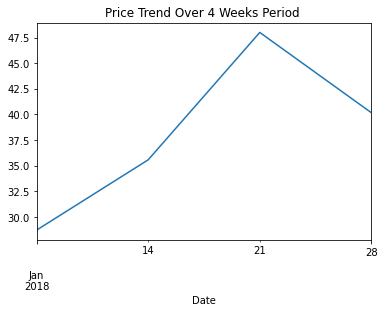

In [21]:
df.groupby(pd.Grouper(key="Date",freq='1W'))["Cost"].mean().plot(kind='line')
plt.title("Price Trend Over 4 Weeks Period ")
plt.show();

In [22]:
df.groupby("Time",sort=False)["Cost"].sum()

Time
Morning    407
Lunch      381
Dinner     107
Evening    132
Name: Cost, dtype: int64

In [23]:
df.groupby("Time",sort=True)["Cost"].sum()

Time
Dinner     107
Evening    132
Lunch      381
Morning    407
Name: Cost, dtype: int64

In [33]:
df3= df["Cost"] -10
df4 = df.merge(df3)
df4

,Time,Day,Cost,Age,Groups,Date
0,Morning,Monday,30,3,Low,2018-01-01
1,Morning,Thursday,30,18,Low,2018-01-04
2,Dinner,Wednesday,30,29,Low,2018-01-23
3,Morning,Tuesday,36,5,High,2018-01-02
4,Morning,Friday,27,86,Low,2018-01-05
5,Morning,Saturday,25,1,Low,2018-01-06
6,Morning,Saturday,25,1,Low,2018-01-06
7,Morning,Sunday,20,55,Low,2018-01-07
8,Morning,Sunday,20,55,Low,2018-01-07
9,Morning,Sunday,20,55,Low,2018-01-07
